# Installing Dependancies


In [212]:
import gpxpy
import gpxpy.gpx

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

from geopy.distance import distance
from geopy.distance import geodesic
from geopy import distance
import math

import haversine as hs
import numpy as np

import datetime
from time import strftime
from time import gmtime



plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

In [213]:

with open('Routes/DD100K_2021.gpx', 'r') as gpx_file:
    DDgpx = gpxpy.parse(gpx_file)

In [214]:
DDgpx

GPX(tracks=[GPXTrack(name='Prince William County Trail Running', segments=[GPXTrackSegment(points=[...])])])

In [215]:
DDgpx.get_track_points_no()

59640

# Loading a GPX file


In [216]:
# Loading a GPX file
with open('Routes/2-loop_mtvernon.gpx', 'r') as gpx_file:
    loop2gpx = gpxpy.parse(gpx_file)

In [217]:

print(loop2gpx.get_track_points_no())
print(loop2gpx.get_elevation_extremes())
print(loop2gpx.get_uphill_downhill())
print('# of tracks - ',len(loop2gpx.tracks))
print('# of segments - ',len(loop2gpx.tracks[0].segments))

4304
MinimumMaximum(minimum=-27.200000762939453, maximum=28.399999618530273)
UphillDownhill(uphill=284.19998838156533, downhill=302.59998800009583)
# of tracks -  1
# of segments -  1


In [218]:
loop2gpx.tracks[0].segments[0].points[:4]

[GPXTrackPoint(38.79649353213608, -77.04552322626114, elevation=-3.0, time=datetime.datetime(2021, 11, 19, 14, 52, 53, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(38.79648883827031, -77.04551886767149, elevation=-3.0, time=datetime.datetime(2021, 11, 19, 14, 52, 54, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(38.796473080292344, -77.04550998285413, elevation=-3.0, time=datetime.datetime(2021, 11, 19, 14, 52, 55, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(38.79645690321922, -77.04550285823643, elevation=-3.0, time=datetime.datetime(2021, 11, 19, 14, 52, 56, tzinfo=SimpleTZ("Z")))]

In [219]:
# making a dictionary that can be converted to Pandas Dataframe
route_info=[]

for track in DDgpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            route_info.append({
                'time': point.time,
                'latitude': point.latitude,
                'longitude':point.longitude,
                'elevation': point.elevation
            })

route_info[:3]

[{'time': datetime.datetime(2021, 12, 4, 11, 31, 3, tzinfo=SimpleTZ("Z")),
  'latitude': 38.576125083491206,
  'longitude': -77.41298032924533,
  'elevation': 98.0},
 {'time': datetime.datetime(2021, 12, 4, 11, 31, 4, tzinfo=SimpleTZ("Z")),
  'latitude': 38.576110918074846,
  'longitude': -77.41298879496753,
  'elevation': 98.0},
 {'time': datetime.datetime(2021, 12, 4, 11, 31, 5, tzinfo=SimpleTZ("Z")),
  'latitude': 38.576098177582026,
  'longitude': -77.4129987694323,
  'elevation': 98.0}]

In [220]:
df = pd.DataFrame(route_info)
df.head()

,time,latitude,longitude,elevation
0,2021-12-04 11:31:03+00:00,38.576125,-77.412980,98.0
1,2021-12-04 11:31:04+00:00,38.576111,-77.412989,98.0
2,2021-12-04 11:31:05+00:00,38.576098,-77.412999,98.0
3,2021-12-04 11:31:06+00:00,38.576086,-77.413008,98.0
4,2021-12-04 11:31:07+00:00,38.576070,-77.413020,98.0


# Create Simple BASE CSV file


In [221]:

df.to_csv('data/df.csv', index=False)

# Simple plots


## Plot the Route


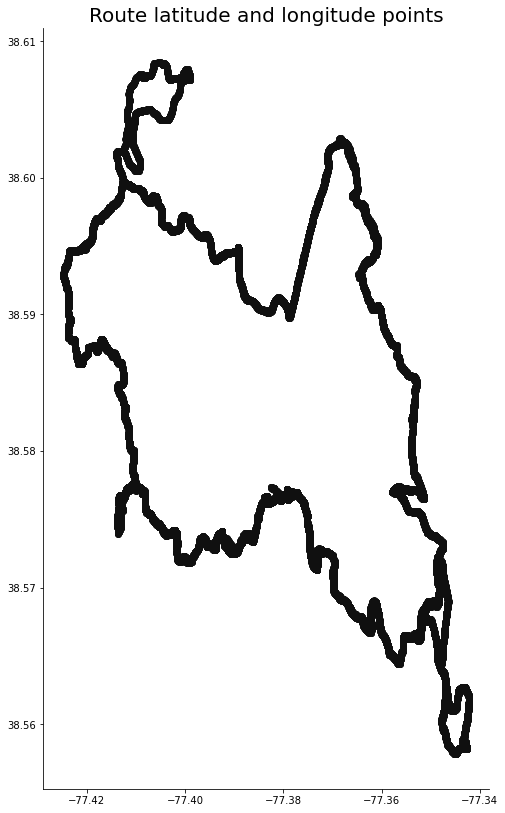

In [222]:
plt.figure(figsize=(8, 14))
plt.scatter(df['longitude'], df['latitude'], color='#101010')
plt.title('Route latitude and longitude points', size=20);

## Plot the Elevation


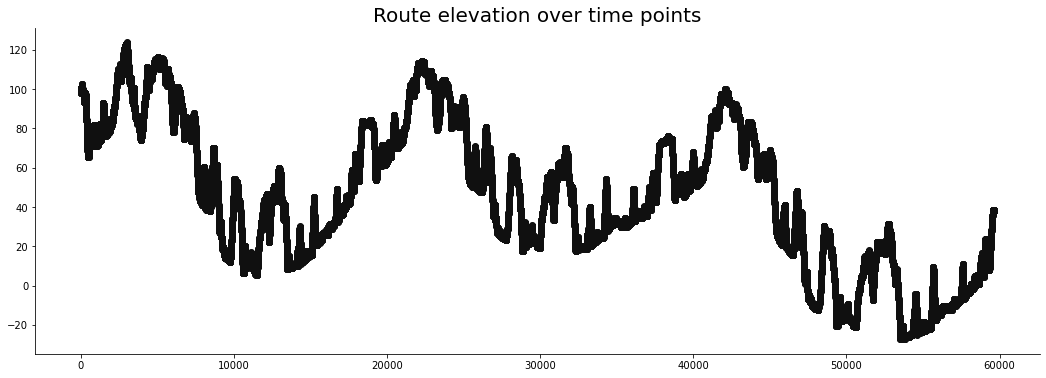

In [223]:
plt.figure(figsize=(18,6))
plt.scatter(df.index, df['elevation'], color='#101010')
plt.title('Route elevation over time points', size=20);

In [224]:
df.head()

,time,latitude,longitude,elevation
0,2021-12-04 11:31:03+00:00,38.576125,-77.412980,98.0
1,2021-12-04 11:31:04+00:00,38.576111,-77.412989,98.0
2,2021-12-04 11:31:05+00:00,38.576098,-77.412999,98.0
3,2021-12-04 11:31:06+00:00,38.576086,-77.413008,98.0
4,2021-12-04 11:31:07+00:00,38.576070,-77.413020,98.0


In [225]:
pointxyz = []
for i in range(0,len(df)):
    pointxyz.append((df['latitude'][i], df['longitude'][i], df['elevation'][i]))

pointxyz[0]

(38.576125083491206, -77.41298032924533, 98.0)

In [226]:
df['pointxyz']= pd.Series(pointxyz)
df.head()

,time,latitude,longitude,elevation,pointxyz
0,2021-12-04 11:31:03+00:00,38.576125,-77.412980,98.0,"(38.576125083491206, -77.41298032924533, 98.0)"
1,2021-12-04 11:31:04+00:00,38.576111,-77.412989,98.0,"(38.576110918074846, -77.41298879496753, 98.0)"
2,2021-12-04 11:31:05+00:00,38.576098,-77.412999,98.0,"(38.576098177582026, -77.4129987694323, 98.0)"
3,2021-12-04 11:31:06+00:00,38.576086,-77.413008,98.0,"(38.5760856885463, -77.4130077380687, 98.0)"
4,2021-12-04 11:31:07+00:00,38.576070,-77.413020,98.0,"(38.576070349663496, -77.41301955655217, 98.0)"


# Distance Calcs


## Geodesic


In [227]:
b_latlon = df['pointxyz'][1+1][:2]
a_latlon = df['pointxyz'][1][:2]
print(b_latlon,a_latlon)
print(geodesic(a_latlon,b_latlon).miles)

(38.576098177582026, -77.4129987694323) (38.576110918074846, -77.41298879496753)
0.0010314937920102975


In [228]:
# Get Step distance, i.e. distance between points.
euc_dist = [0]
# fl_dist =[0]

for i in range(len(df)-1):
    
    b_latlon = df['pointxyz'][i+1][:2]
    a_latlon = df['pointxyz'][i][:2]

    # OG elevation in meters (1000m = .6 miles)  so change meters into km and then convert to miles
    b_elv = df['pointxyz'][i+1][2]/1000*.6
    a_elv = df['pointxyz'][i][2]/1000*.6
    eldiff = b_elv-a_elv

    flat_distance =geodesic(a_latlon,b_latlon).miles
    # fl_dist.append(flat_distance)

    euc_distance = math.sqrt(flat_distance**2 + eldiff**2)
    euc_dist.append(euc_distance)

df['euc_dist'] = pd.Series(euc_dist)
# df['flat_dist'] = pd.Series(fl_dist)

df.head()


,time,latitude,longitude,elevation,pointxyz,euc_dist
0,2021-12-04 11:31:03+00:00,38.576125,-77.412980,98.0,"(38.576125083491206, -77.41298032924533, 98.0)",0.000000
1,2021-12-04 11:31:04+00:00,38.576111,-77.412989,98.0,"(38.576110918074846, -77.41298879496753, 98.0)",0.001079
2,2021-12-04 11:31:05+00:00,38.576098,-77.412999,98.0,"(38.576098177582026, -77.4129987694323, 98.0)",0.001031
3,2021-12-04 11:31:06+00:00,38.576086,-77.413008,98.0,"(38.5760856885463, -77.4130077380687, 98.0)",0.000989
4,2021-12-04 11:31:07+00:00,38.576070,-77.413020,98.0,"(38.576070349663496, -77.41301955655217, 98.0)",0.001237


## Haversine


In [229]:
def haversine_distance(lat1, lon1, lat2, lon2) -> float:
    distance = hs.haversine(
        point1=(lat1,lon1),
        point2=(lat2,lon2),
        unit=hs.Unit.MILES
    )
    return np.round(distance,8)

In [230]:
haversine_distance(
    lat1=df.iloc[0]['latitude'],
    lon1=df.iloc[0]['longitude'],
    lat2=df.iloc[1]['latitude'],
    lon2=df.iloc[1]['longitude']
)

0.00108029

In [231]:
distances = [np.nan]
cap_mph = 10
distance_cap = 1/(60/cap_mph*60)

for i in range(len(df)):
    if i == 0:
        continue
    else:
        unit_dist = haversine_distance(
            lat1=df.iloc[i - 1]['latitude'],
            lon1=df.iloc[i - 1]['longitude'],
            lat2=df.iloc[i]['latitude'],
            lon2=df.iloc[i]['longitude']
        )
        if unit_dist > distance_cap:
            distances.append(np.nan)
        else:
            distances.append(unit_dist)

df['distance'] = distances


In [232]:
cap_mph = 10
distance_capft = 1/(60/cap_mph*60)*5280
distance_capft

14.666666666666668

In [233]:
df['distance'].sum()
# df.distance.describe()
df['distance'][740:745]

740    0.000570
741    0.000629
742         NaN
743    0.000728
744    0.002583
Name: distance, dtype: float64

In [234]:
df['distance'] = df['distance'].interpolate().fillna(0)

#### Speed Calc


In [236]:
# 1 sec is 1/60th of minute and a minute is 1/60th of an hour so 

speed = []

for i in range(len(df)):
    mph = df['distance'][i]/(1/60/60)
    speed.append(mph)

df['mph'] = pd.Series(speed)



In [237]:
df['mph'].describe()
df[df['mph'].isna()]
df['mph'][740:745]

740    2.053368
741    2.265048
742    2.442384
743    2.619720
744    9.298548
Name: mph, dtype: float64

#### Elevation Change, Cum Elevation, and Cum Distance


In [238]:
df['elevation_change'] = df['elevation'].diff()
df['cum_elevation'] = df['elevation_change'].cumsum()
df['cum_distance'] = df['distance'].cumsum()
df = df.fillna(0)
df.head()


,time,latitude,longitude,elevation,pointxyz,euc_dist,distance,mph,elevation_change,cum_elevation,cum_distance
0,2021-12-04 11:31:03+00:00,38.576125,-77.412980,98.0,"(38.576125083491206, -77.41298032924533, 98.0)",0.000000,0.000000,0.000000,0.0,0.0,0.000000
1,2021-12-04 11:31:04+00:00,38.576111,-77.412989,98.0,"(38.576110918074846, -77.41298879496753, 98.0)",0.001079,0.001080,3.889044,0.0,0.0,0.001080
2,2021-12-04 11:31:05+00:00,38.576098,-77.412999,98.0,"(38.576098177582026, -77.4129987694323, 98.0)",0.001031,0.001032,3.715488,0.0,0.0,0.002112
3,2021-12-04 11:31:06+00:00,38.576086,-77.413008,98.0,"(38.5760856885463, -77.4130077380687, 98.0)",0.000989,0.000990,3.562560,0.0,0.0,0.003102
4,2021-12-04 11:31:07+00:00,38.576070,-77.413020,98.0,"(38.576070349663496, -77.41301955655217, 98.0)",0.001237,0.001237,4.454028,0.0,0.0,0.004339


In [239]:
# range of elevation 
df.describe()

,latitude,longitude,elevation,euc_dist,distance,mph,elevation_change,cum_elevation,cum_distance
count,59640.000000,59640.000000,59640.000000,59640.000000,59640.000000,59640.000000,59640.000000,59640.000000,59640.000000
mean,38.580718,-77.379950,45.231207,0.001130,0.001103,3.972317,-0.000999,-52.768793,34.999681
std,0.012729,0.025952,36.452463,0.000702,0.000458,1.649963,0.165107,36.452463,18.875987
min,38.557794,-77.424799,-27.200001,0.000000,0.000000,0.000000,-1.199997,-125.200001,0.000000
25%,38.571374,-77.406517,19.400000,0.000807,0.000800,2.878974,0.000000,-78.600000,19.706789
50%,38.576993,-77.375818,43.400002,0.001093,0.001087,3.912318,0.000000,-54.599998,35.982171
75%,38.592803,-77.354579,74.800003,0.001399,0.001391,5.009040,0.000000,-23.199997,51.289284
max,38.608468,-77.342196,123.800003,0.061611,0.002777,9.996084,2.599998,25.800003,65.808048


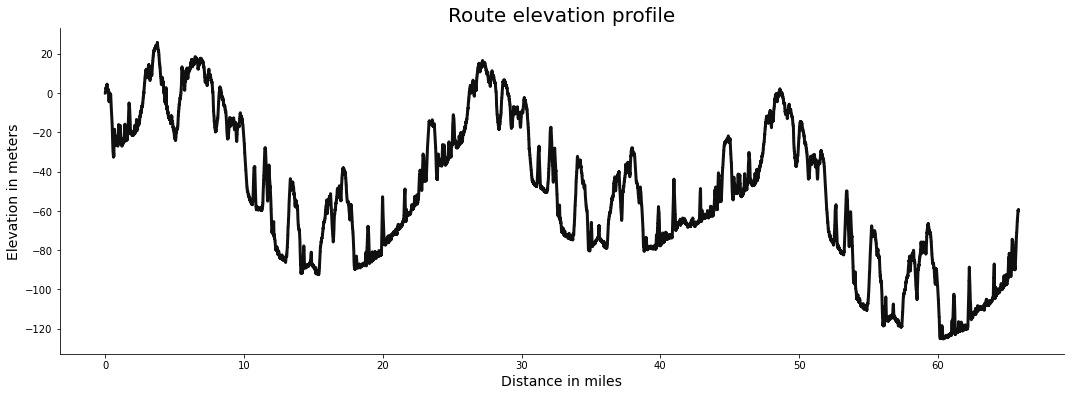

In [240]:
plt.figure(figsize=(18,6))
plt.plot(df['cum_distance'], df['cum_elevation'], color='#101010', lw=3)
plt.title('Route elevation profile', size=20)
plt.xlabel('Distance in miles', size=14)
plt.ylabel('Elevation in meters', size=14);

In [241]:
# df['5sec_rolling_elv'] = df['elevation_change'].rolling(5).mean()
df['second'] = df.index
# df[10:15]

In [242]:
# seconds to time
def sec_2_time(seconds):
    str_time = str(datetime.timedelta(seconds=seconds))
    return str_time
sec_2_time(3905)

'1:05:05'

In [243]:
# Adding Elapsed Time
def elapsed_time(row):
    time = str(datetime.timedelta(seconds=row['second']))
    return time

df['elapsed_time']= df.apply(elapsed_time, axis=1)

# Adding steps/distance in feet
df['step_feet'] = df['distance'] * 5280
df.head()


,time,latitude,longitude,elevation,pointxyz,euc_dist,distance,mph,elevation_change,cum_elevation,cum_distance,second,elapsed_time,step_feet
0,2021-12-04 11:31:03+00:00,38.576125,-77.412980,98.0,"(38.576125083491206, -77.41298032924533, 98.0)",0.000000,0.000000,0.000000,0.0,0.0,0.000000,0,0:00:00,0.000000
1,2021-12-04 11:31:04+00:00,38.576111,-77.412989,98.0,"(38.576110918074846, -77.41298879496753, 98.0)",0.001079,0.001080,3.889044,0.0,0.0,0.001080,1,0:00:01,5.703931
2,2021-12-04 11:31:05+00:00,38.576098,-77.412999,98.0,"(38.576098177582026, -77.4129987694323, 98.0)",0.001031,0.001032,3.715488,0.0,0.0,0.002112,2,0:00:02,5.449382
3,2021-12-04 11:31:06+00:00,38.576086,-77.413008,98.0,"(38.5760856885463, -77.4130077380687, 98.0)",0.000989,0.000990,3.562560,0.0,0.0,0.003102,3,0:00:03,5.225088
4,2021-12-04 11:31:07+00:00,38.576070,-77.413020,98.0,"(38.576070349663496, -77.41301955655217, 98.0)",0.001237,0.001237,4.454028,0.0,0.0,0.004339,4,0:00:04,6.532574


In [244]:
# Identify times when runner is stopped or moving very slowly
def find_stops(row):
    if row['mph'] < 1:
        return 0
    return 1

df['moving_time'] = df.apply(find_stops, axis=1)

In [245]:
df.step_feet.describe()

count    59640.000000
mean         5.826065
std          2.419945
min          0.000000
25%          4.222495
50%          5.738066
75%          7.346592
max         14.660923
Name: step_feet, dtype: float64

In [246]:
df['distance'].sum()

65.80804768

In [247]:

strftime("%H:%M:%S", gmtime(3905))
'00:11:06'

'00:11:06'

In [205]:
# levels of gradient
# flat = 0
# slight up = 
# slight down <
# steep up > 0.5
# steep down < 0.5
labels = ['SteepD','SlightD','Flat','SlightU','SteepU']
custom_cut =[-100, -0.5, -0.25, 0.25, 0.5, 100]

#  do it over a set length of distance... not every step.

In [206]:
df.to_csv('data/df_add.csv', index=False)